In [1]:
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
finalbooks = pd.read_csv('finalbooks.csv')
finalratings = pd.read_csv('finalratings.csv')

In [3]:
print(finalbooks.columns)
finalbooks

Index(['Unnamed: 0', 'author_names', 'publication_year', 'title',
       'title_without_series', 'language_code', 'average_rating',
       'ratings_count', 'image_url', 'description', 'num_pages', 'genre',
       'newbook_id'],
      dtype='object')


,Unnamed: 0,author_names,publication_year,title,title_without_series,language_code,average_rating,ratings_count,image_url,description,num_pages,genre,newbook_id
0,0,Jennifer Weiner,2009.000000,Best Friends Forever,Best Friends Forever,eng,3.49,51184.0,https://s.gr-assets.com/assets/nophoto/book/11...,Addie Downs and Valerie Adler were eight when ...,368.000000,to-read|chick-lit|currently-reading|fiction|bo...,1
1,1,Beth Revis,2014.000000,The Body Electric,The Body Electric,eng,3.71,1525.0,https://images.gr-assets.com/books/1406979059m...,The future world is at peace.Ella Shepherd has...,351.000000,to-read|young-adult|sci-fi|science-fiction|ya|...,2
2,2,Jonathan Auxier,2011.000000,Peter Nimble and His Fantastic Eyes (Peter Nim...,Peter Nimble and His Fantastic Eyes (Peter Nim...,en-US,4.04,6049.0,https://images.gr-assets.com/books/1353594747m...,Peter Nimble and His Fantastic Eyesis the utte...,400.000000,to-read|fantasy|currently-reading|middle-grade...,3
3,3,Lynsay Sands,2005.000000,A Quick Bite (Argeneau #1),A Quick Bite (Argeneau #1),en-US,3.91,32140.0,https://images.gr-assets.com/books/1410129015m...,That hot guy tied to Lissianna Argeneau's bed?...,360.000000,to-read|vampires|paranormal-romance|paranormal...,4
4,4,Rebecca Solnit,2014.000000,Men Explain Things to Me,Men Explain Things to Me,eng,3.92,19660.0,https://images.gr-assets.com/books/1393447237m...,"In her comic| scathing essay ""Men Explain Thin...",130.000000,to-read|currently-reading|non-fiction|feminism...,5
5,5,Kim Harrison,2009.000000,White Witch| Black Curse (The Hollows| #7),White Witch| Black Curse (The Hollows| #7),en-US,4.35,38736.0,https://s.gr-assets.com/assets/nophoto/book/11...,New York Timesbestselling author Kim Harrison ...,504.000000,to-read|urban-fantasy|fantasy|paranormal|favor...,6
6,6,Alessandra Torre,2014.000000,End of the Innocence (Innocence| #3),End of the Innocence (Innocence| #3),eng,4.21,5833.0,https://images.gr-assets.com/books/1391926144m...,He thought I owned him. He thought he loved me...,276.000000,to-read|currently-reading|romance|contemporary...,7
7,7,J. Lynn|Jennifer L. Armentrout,2015.000000,Forever with You (Wait for You| #5),Forever with You (Wait for You| #5),eng,4.14,6325.0,https://images.gr-assets.com/books/1438275513m...,In the irresistibly sexy series from #1 New Yo...,370.000000,to-read|new-adult|romance|currently-reading|fa...,8
8,8,Brandon Mull,2007.000000,The Candy Shop War (The Candy Shop War| #1),The Candy Shop War (The Candy Shop War| #1),Unknown,4.04,20158.0,https://s.gr-assets.com/assets/nophoto/book/11...,What if there were a place where you could get...,404.000000,to-read|fantasy|currently-reading|favorites|yo...,9
9,9,Markus Zusak,2010.711768,I Am the Messenger,I Am the Messenger,en-US,4.09,94968.0,https://images.gr-assets.com/books/1398483261m...,protect the diamondssurvive the clubsdig deep ...,360.000000,favorites|currently-reading|young-adult|fictio...,10


In [4]:
finalratings

,Unnamed: 0,rating,newbook_id,newuser_id
0,0,5,3639,1
1,1,5,3639,79
2,2,4,3639,198
3,3,5,3639,245
4,4,5,3639,256
5,5,4,3639,268
6,6,2,3639,355
7,7,4,3639,379
8,8,5,3639,408
9,9,3,3639,603


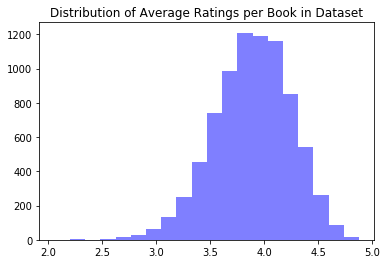

In [5]:
# Average Ratings for the books in the Data Base

agg = finalratings.groupby(by= 'newbook_id', as_index=False).agg({'rating':pd.Series.mean})
n, bins, patches = plt.hist(agg['rating'], 20, facecolor='blue', alpha=0.5)
plt.title('Distribution of Average Ratings per Book in Dataset');

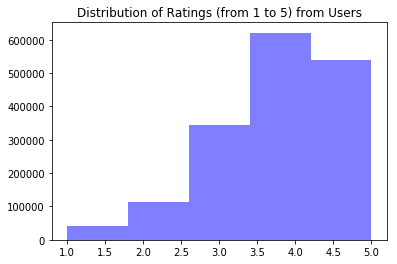

In [6]:
# Distribution of the individual ratings given by our User Base

n, bins, patches = plt.hist(finalratings['rating'], 5, facecolor='blue', alpha=0.5)
plt.title('Distribution of Ratings (from 1 to 5) from Users');

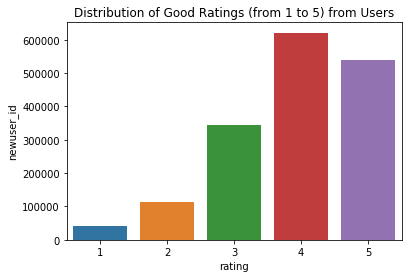

In [7]:
# Distribution of the individual ratings given by our User Base

distr = finalratings.groupby(by= 'rating', as_index=False).agg({'newuser_id':pd.Series.count}) 
sns.barplot(x="rating" , y="newuser_id",  data=distr)
plt.title('Distribution of Good Ratings (from 1 to 5) from Users');

4    621243
5    539074
3    344002
2    112408
1     40897
Name: rating, dtype: int64

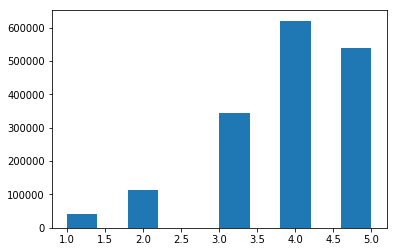

In [9]:
# Distribution of the # of Ratings per User

plt.hist(finalratings['rating']);
finalratings['rating'].value_counts()

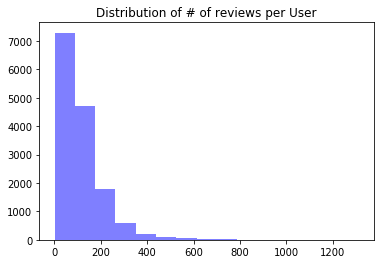

In [12]:
# Distribution of the # of Ratings per User

n, bins, patches = plt.hist(finalratings['newuser_id'].value_counts(), 15, facecolor='blue', alpha=0.5)
plt.title('Distribution of # of reviews per User')
plt.show()

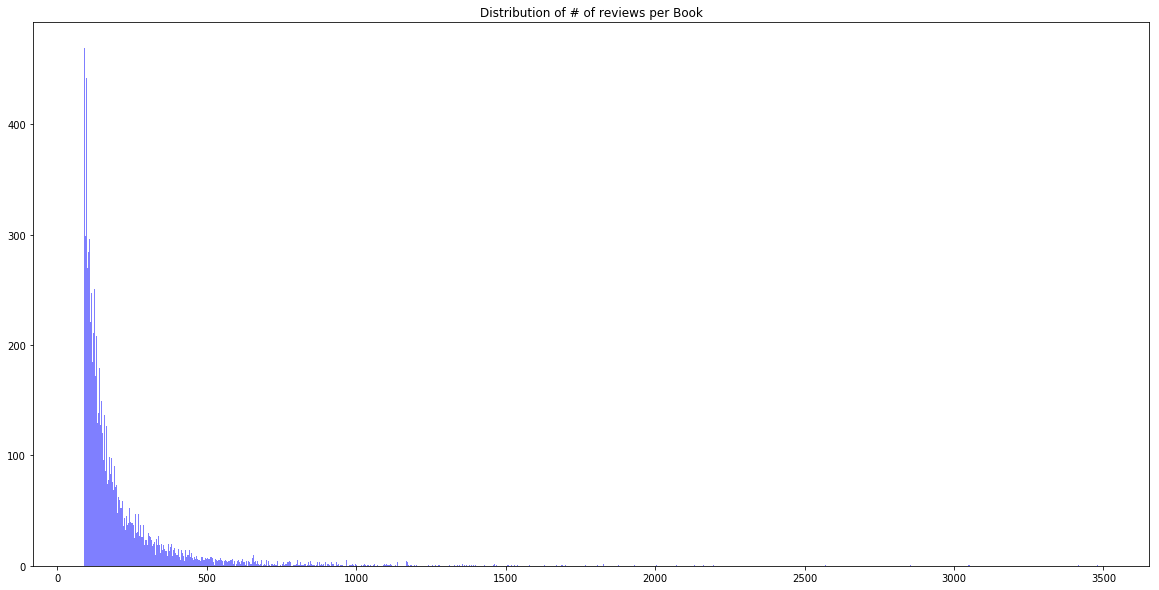

In [13]:
# Distribution of the # of Ratings per Book

facet, axes = plt.subplots(1, 1, figsize=(20, 10))
n, bins, patches = plt.hist(finalratings['newbook_id'].value_counts(), 1000, facecolor='blue', alpha=0.5 )   #log= True
plt.title('Distribution of # of reviews per Book')
plt.show()

In [24]:
finalbooks["firstgenre"] = finalbooks["genre"].apply(lambda x: x.split("|")[0])

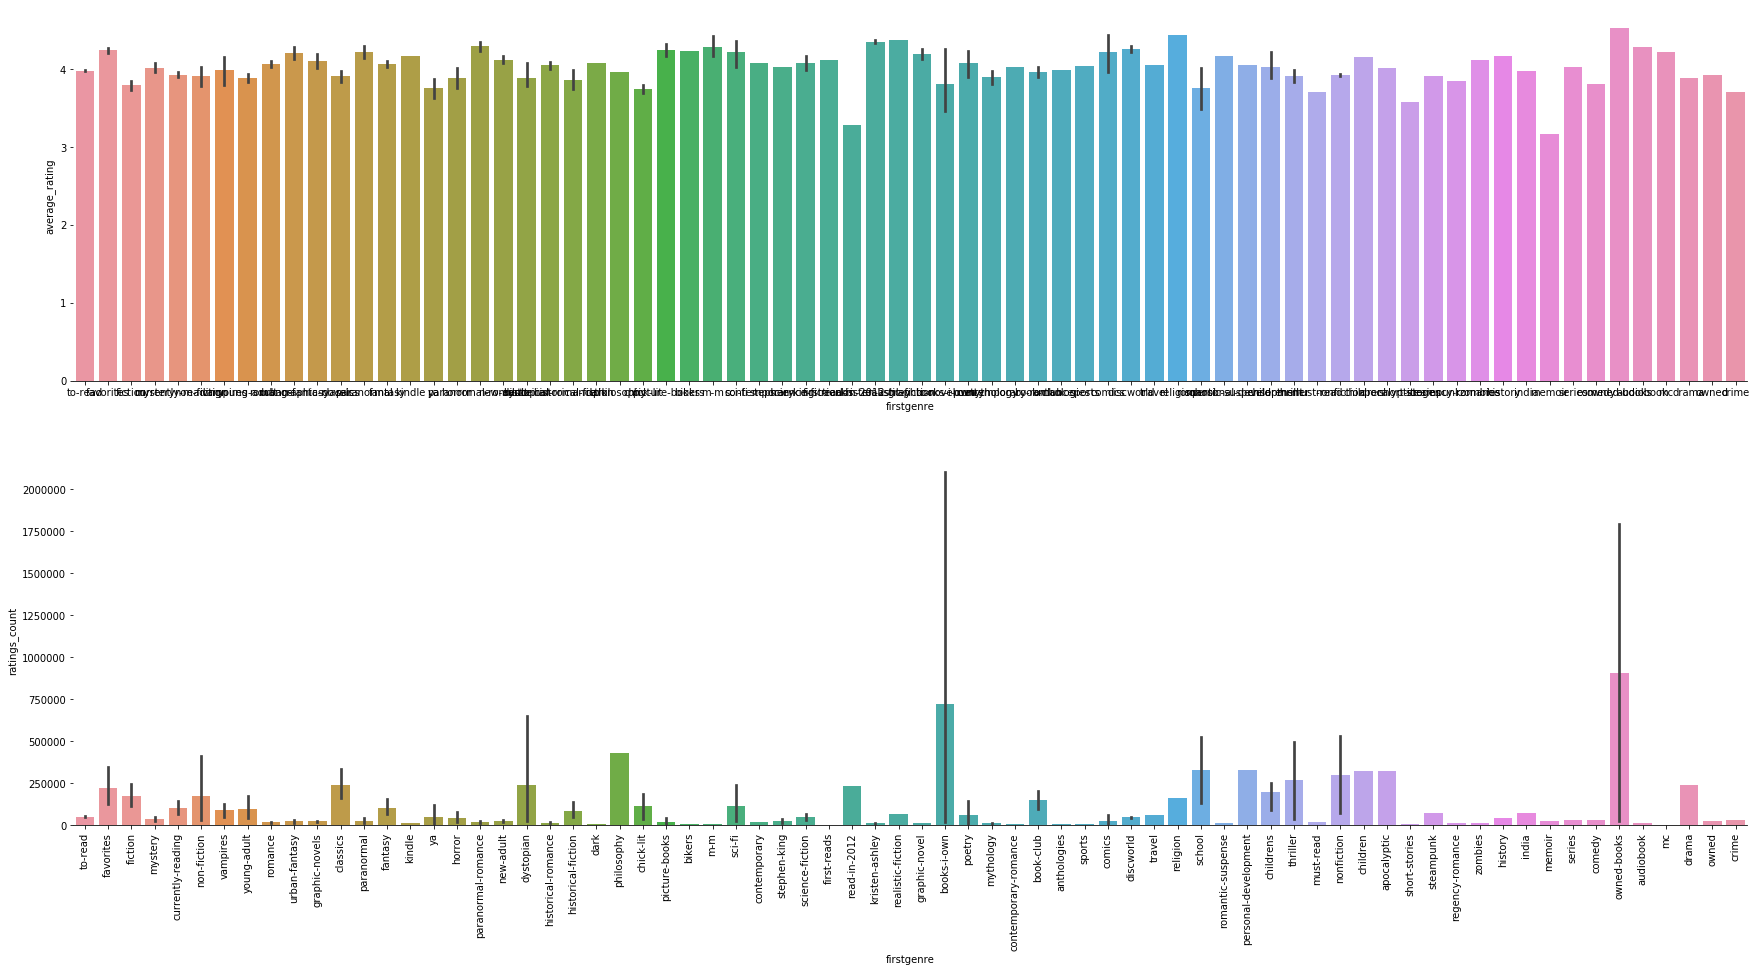

In [25]:
# Distribution of the # of Ratings per Book
facet, axes = plt.subplots(2, 1, figsize=(30, 15))
sns.despine(left=True)
sns.barplot(x="firstgenre", y="average_rating",  data=finalbooks,  ax=axes[0])
sns.barplot(x="firstgenre", y="ratings_count",  data=finalbooks,  ax=axes[1])
plt.xticks(rotation=90)

plt.show()